In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load data into dataframe with column names
file_path = '/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin1', usecols=[0, 5], names=['target', 'text'])

# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.1, random_state=42)

# Create a pipeline for text transformation and classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear')),
])

# Train the classifier
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(solver='liblinear'))])

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80     79812
           4       0.80      0.81      0.81     80188

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000

Accuracy score: 0.803325


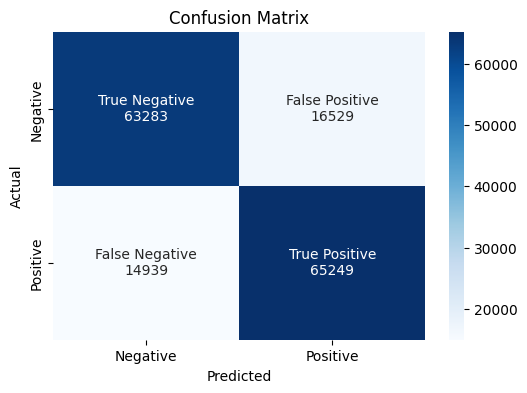

Text: I am happy
Sentiment weighting: 3.937444981177825
Sentiment category: Very Positive

Text: Why me...
Sentiment weighting: 0.08428786921022012
Sentiment category: Very Negative

Text: Have fun!
Sentiment weighting: 3.536870664030485
Sentiment category: Very Positive

Text: Oh man...
Sentiment weighting: 1.2692636151902943
Sentiment category: Negative

Text: I am a shoe.
Sentiment weighting: 2
Sentiment category: Neutral



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the classifier
predictions_test = pipeline.predict(X_test)
print('Classification report:\n', classification_report(y_test, predictions_test))
print('Accuracy score:', accuracy_score(y_test, predictions_test))

# Plot the confusion matrix
confusion = confusion_matrix(y_test, predictions_test)

# Define labels for the confusion matrix
labels = np.array([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])

# Define confusion matrix with labels
confusion_labelled = np.zeros_like(confusion, dtype=object)
for i in range(2):
    for j in range(2):
        confusion_labelled[i, j] = f'{labels[i, j]}\n{confusion[i, j]}'

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=confusion_labelled, cmap='Blues', fmt='', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()







# Function to calculate sentiment weighting
def calculate_sentiment(text):
    probs = pipeline.predict_proba([text])
    sentiment_value = 0 * probs[0][0] + 4 * probs[0][1]
    return 2 if 1.5 < sentiment_value < 2.5 else sentiment_value

# Function to convert sentiment weighting to category
def sentiment_to_category(sentiment_value):
    if sentiment_value <= 0.5:
        return 'Very Negative'
    elif sentiment_value <= 1.5:
        return 'Negative'
    elif sentiment_value <= 2.5:
        return 'Neutral'
    elif sentiment_value <= 3.5:
        return 'Positive'
    else:
        return 'Very Positive'

# Texts to judge sentiment
texts_to_judge_sentiment = ["I am happy", "Why me...", "Have fun!", "Oh man...", "I am a shoe."]

# Loop through each text to predict sentiment, print weighting and category
for text in texts_to_judge_sentiment:
    sentiment_weighting = calculate_sentiment(text)
    sentiment_category = sentiment_to_category(sentiment_weighting)

    print(f'Text: {text}\nSentiment weighting: {sentiment_weighting}\nSentiment category: {sentiment_category}\n')

In [3]:
# Print the text version of the confusion matrix
print("\nText Version of the Confusion Matrix:")
for i in range(2):
    row_text = []
    for j in range(2):
        row_text.append(f'{labels[i, j]}: {confusion[i, j]}')
    print(' | '.join(row_text))


Text Version of the Confusion Matrix:
True Negative: 63283 | False Positive: 16529
False Negative: 14939 | True Positive: 65249
